In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from ta import add_all_ta_features
from ta.utils import dropna
import yfinance as yf
import datetime
import seaborn as sns
import numpy as np

In [93]:
start = datetime.datetime(2012,4,6)
end = datetime.datetime(2022,4,6)

In [102]:
stock = yf.download('AAPL',start,end)

[*********************100%***********************]  1 of 1 completed


In [103]:
stock = dropna(stock)
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-04-09,22.361786,22.851429,22.332144,22.722500,19.456690,597536800
2012-04-10,22.854643,23.000000,22.357143,22.444286,19.218460,889725200
2012-04-11,22.721430,22.745358,22.262142,22.364286,19.149961,696614800
2012-04-12,22.321428,22.547501,22.160713,22.241785,19.045061,614336800
2012-04-13,22.289642,22.310715,21.553928,21.615356,18.508675,859644800


In [112]:
df = add_all_ta_features(
    stock, open="Open", high="High", low="Low", close="Close", volume="Volume")

C:\Users\harsh\anaconda3\envs\python\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\harsh\anaconda3\envs\python\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [113]:
#df.head()
df.info()
#trend_psar_down has many null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2012-04-09 to 2022-04-05
Data columns (total 92 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       2516 non-null   float64
 1   High                       2516 non-null   float64
 2   Low                        2516 non-null   float64
 3   Close                      2516 non-null   float64
 4   Adj Close                  2516 non-null   float64
 5   Volume                     2516 non-null   int64  
 6   volume_adi                 2516 non-null   float64
 7   volume_obv                 2516 non-null   int64  
 8   volume_cmf                 2497 non-null   float64
 9   volume_fi                  2503 non-null   float64
 10  volume_em                  2515 non-null   float64
 11  volume_sma_em              2502 non-null   float64
 12  volume_vpt                 2516 non-null   float64
 13  volume_vwap                250

In [114]:
df = df.drop(["trend_psar_down","trend_psar_up"],axis = 1)

In [116]:
df = df.dropna()

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [196]:
scaler = MinMaxScaler()

In [178]:
X = df.drop("Close",axis = 1)
y = df["Close"]
X.head()

,Open,High,Low,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2012-07-26,20.705713,20.728571,20.370001,17.580532,406632800,-3.425615e+09,-10816318800,0.171146,-1.058212e+08,-0.000063,...,0.298065,0.986843,-0.688778,8.820024,1.887850,6.932174,21.029583,-0.015651,-0.015652,-9.642735
2012-07-27,20.536072,20.922501,20.413929,17.894909,403936400,-3.059691e+09,-10412382400,0.217803,-6.951793e+07,0.014974,...,0.140904,0.817655,-0.676751,6.945565,2.899393,4.046172,21.020596,1.788194,1.772394,-8.026973
2012-07-30,21.104286,21.408571,20.993570,18.196743,379142400,-2.968329e+09,-10033240000,0.179813,-4.049422e+07,0.058325,...,0.148694,0.683863,-0.535168,4.948802,3.309275,1.639527,21.027191,1.686723,1.672655,-6.475643
2012-07-31,21.543928,21.846430,21.525715,18.677780,462327600,-2.602796e+09,-9570912400,0.183487,2.394752e+06,0.033644,...,0.363931,0.619876,-0.255945,4.800551,3.607530,1.193021,21.033824,2.643560,2.609221,-4.003271
2012-08-01,21.996786,22.014286,21.535713,18.556993,384501600,-2.768648e+09,-9955414000,0.138849,-5.696233e+06,0.011068,...,0.474916,0.590884,-0.115969,3.235976,3.533219,-0.297243,21.036801,-0.646735,-0.648835,-4.624115


In [179]:
y = np.array(y)

In [180]:
y = np.reshape(y,(-1,1))
y = pd.DataFrame(y)
y.shape

(2440, 1)

In [197]:
X_transformed = scaler.fit_transform(X)
y_transformed = scaler.fit_transform(y)

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y_transformed,train_size = 0.8)
X_train.shape

(1952, 89)

In [199]:
X_train = np.array(X_train)
X_train = X_train.reshape(1952,89,1)

In [190]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [236]:
model = Sequential()

In [237]:
model.add(LSTM(units = 180, activation = 'relu',return_sequences = True))
model.add(LSTM(units = 60, activation = 'relu',return_sequences = True))
model.add(LSTM(units = 60, activation = 'relu',return_sequences = True))
model.add(LSTM(units = 30))
model.add(Dense(units = 1))
model.compile(loss = "mse", optimizer = "adam", metrics = ["accuracy"])

In [238]:
model.fit(X_train,y_train, epochs = 10)

Epoch 1/10
61/61 [==============================] - 12s 151ms/step - loss: 0.0653 - accuracy: 5.1230e-04
Epoch 2/10
61/61 [==============================] - 9s 150ms/step - loss: 0.0716 - accuracy: 5.1230e-04
Epoch 3/10
61/61 [==============================] - 9s 152ms/step - loss: 0.0659 - accuracy: 5.1230e-04
Epoch 4/10
61/61 [==============================] - 10s 168ms/step - loss: 0.0561 - accuracy: 5.1230e-04
Epoch 5/10
61/61 [==============================] - 10s 169ms/step - loss: 0.0092 - accuracy: 0.0010
Epoch 6/10
61/61 [==============================] - 10s 165ms/step - loss: 0.0090 - accuracy: 0.0010
Epoch 7/10
61/61 [==============================] - 10s 165ms/step - loss: 0.0066 - accuracy: 0.0010
Epoch 8/10
61/61 [==============================] - 10s 167ms/step - loss: 0.0055 - accuracy: 0.0010
Epoch 9/10
61/61 [==============================] - 10s 171ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 10/10
61/61 [==============================] - 11s 174ms/step - loss: n

In [245]:
X_test = np.array(X_test)
X_test = X_test.reshape(-1,89,1)

In [246]:
y_pred = model.predict(X_test)

In [247]:
y_pred_inv_transformed = scaler.inverse_transform(y_pred)
y_actual_inv_transformed = scaler.inverse_transform(y_test)

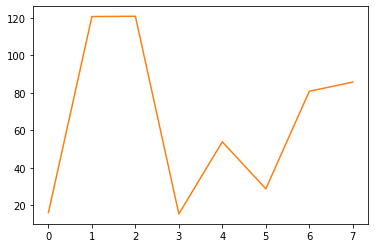

In [253]:
plt.plot(y_pred_inv_transformed[480:])
plt.plot(y_actual_inv_transformed[480:])

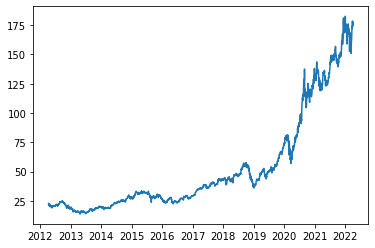

In [249]:
plt.plot(stock["Open"])

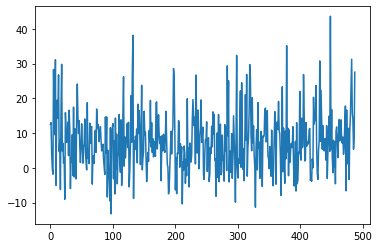